In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt 
import itertools 
from bokeh.io import output_notebook, show, save

In [2]:
output_notebook()

Loading BokehJS ...

In [3]:
pd.set_option('display.max_rows', 100) 
df = pd.read_excel("HealthDataSet.xlsx", header=None).iloc[1:]
df.head(100)

,0,1,2,3,4,5,6
1,9bbi18050005,2018-06-25,12.950000,hamburger w fries water,f,hamburger,48
2,9bbi18050005,2018-06-25,12.950000,hamburger w fries water,f,fry,48
3,9bbi18050005,2018-06-25,12.950000,hamburger w fries water,w,water,48
4,9bbi18050005,2018-09-04,9.683333,handful of trail mix,f,trail mix,119
5,9bbi18050005,2018-09-04,9.683333,handful of trail mix,modifier,handful,119
6,9bbi18050005,2018-08-16,8.250000,2 eggs 1 toast,f,egg toast,100
7,9bbi18050005,2018-08-03,17.566667,soda,b,soda,87
8,9bbi18050005,2018-06-20,11.000000,1 pint beer,b,beer,43
9,9bbi18050005,2018-05-18,18.383333,cheeseburger fries baked brand,f,cheeseburger,10
10,9bbi18050005,2018-05-18,18.383333,cheeseburger fries baked brand,f,fry,10


In [4]:
df_new = df[df[0]=="9bbi18050005"]
df_new.head(100)

,0,1,2,3,4,5,6
1,9bbi18050005,2018-06-25,12.950000,hamburger w fries water,f,hamburger,48
2,9bbi18050005,2018-06-25,12.950000,hamburger w fries water,f,fry,48
3,9bbi18050005,2018-06-25,12.950000,hamburger w fries water,w,water,48
4,9bbi18050005,2018-09-04,9.683333,handful of trail mix,f,trail mix,119
5,9bbi18050005,2018-09-04,9.683333,handful of trail mix,modifier,handful,119
6,9bbi18050005,2018-08-16,8.250000,2 eggs 1 toast,f,egg toast,100
7,9bbi18050005,2018-08-03,17.566667,soda,b,soda,87
8,9bbi18050005,2018-06-20,11.000000,1 pint beer,b,beer,43
9,9bbi18050005,2018-05-18,18.383333,cheeseburger fries baked brand,f,cheeseburger,10
10,9bbi18050005,2018-05-18,18.383333,cheeseburger fries baked brand,f,fry,10


In [9]:
df_newCount = pd.DataFrame(df_new[5].0)

df_newCount.head(100)


,5
coffee creamer,78
handful,23
beer,21
egg,21
grilled,17
salad,17
chip,16
orange juice,16
watermelon,16
rice,15


In [4]:
df_excluded = df_new[df_new[3].str.contains(" w | n | and | with | && ")]
df_excluded.head(100)

,0,1,2,3,4,5,6
1,9bbi18050005,2018-06-25,12.950000,hamburger w fries water,f,hamburger,48
2,9bbi18050005,2018-06-25,12.950000,hamburger w fries water,f,fry,48
3,9bbi18050005,2018-06-25,12.950000,hamburger w fries water,w,water,48
16,9bbi18050005,2018-07-10,12.066667,onion and corn saute,f,onion,63
17,9bbi18050005,2018-07-10,12.066667,onion and corn saute,f,corn,63
23,9bbi18050005,2018-08-30,8.066667,cup of coffee w creamer,b,coffee creamer,114
24,9bbi18050005,2018-05-23,8.683333,cup of coffee w creamer,b,coffee creamer,15
45,9bbi18050005,2018-09-02,7.750000,cup of coffee w creamer,b,coffee creamer,117
47,9bbi18050005,2018-05-30,8.333333,half bagel w cream cheese,f,bagel cream cheese,22
54,9bbi18050005,2018-08-27,13.500000,meatloaf w mashed potatoes,f,mashed potato,111


In [11]:
# df_relationfrequrncy = df_excluded[3].value_counts()
# df_relationfrequrncy.head(100)

In [5]:
df_excludedNew =df_excluded[3].str.split(r" w | n | and| with | &&", n = -1, expand = True).iloc[:-2] 
df_excludedNew.head(5)


,0,1,2
1,hamburger,fries water,None
2,hamburger,fries water,None
3,hamburger,fries water,None
16,onion,corn saute,None
17,onion,corn saute,None


In [31]:
# df_excludedNew[0].value_counts()

In [6]:
df_new = df_excludedNew[0].append(df_excludedNew[1])
# df_new.head(100)
df_new1 = df_new.value_counts()
df_new1.head(100)
new_dictionary = df_new1.to_dict()
# print(new_dictionary)

names = set(new_dictionary.values())
print(names)

update_dictionary = {}
for n in names:
#     update_dictionary[n] = [k for k in new_dictionary.keys() if new_dictionary[k] == n]
# print(update_dictionary)

    update_dictionary = {n:[k for k in new_dictionary.keys() if new_dictionary[k] == n] for n in set(new_dictionary.values())}
print(update_dictionary)



{1, 2, 3, 4, 5, 70, 7, 8, 6, 12, 81}
{1: ['cream', 'chilaquiles breakfast', 'plate paella', ' qtr cup beans', ' cup coffee', 'chips daughter left', 'paella', 'half bagel', 'onionrings', 'tonic water', ' bowl popcorn', 'vanilla ice cream', '12oz iced coffee', 'churro', 'cream cheese', 'cheeseburger', '1 fish', '2 oz macallan', ' salsa', ' salad', '2 arnold palmers'], 2: ['lentils', 'spinach salad', ' polenta', 'meat sauce', 'sushi roll', 'grilled chicken', ' chicken blk ', ' egg scramble', 'bowl chili', 'pinto beans', ' sausage', 'orange chicken', 'a beer', 'chile relleno', 'less creamer', 'potatoes', '2 enchiladas', 'salad', 'clam chowder', ' dirty rice', 'nuts', '1 tbl sugar', ' octopus', 'fruit bowl', 'club sandwich', 'spaghetti', 'brn ric', ' half cup coffee', 'kidney beans', 'veggies', 'half lentils wquinoa', 'quinoa mediterranean salad', ' brown rice', 'half cup salsa', 'mashed potatoes', 'cottage cheese', ' brown rice shrimp', ' veggie era', 'hummus snack', ' steamed broccoli', '

In [ ]:
# for key, value in update_dictionary.items():
#     if len(value) > 1:
        
    

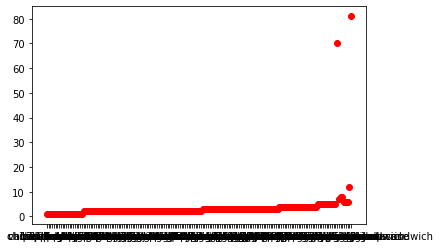

In [199]:
xs, ys=zip(*((str(x), k) for k in update_dictionary for x in update_dictionary[k]))
xs,ys
plt.plot(xs, ys, 'ro')
plt.show()
        
        
        
    

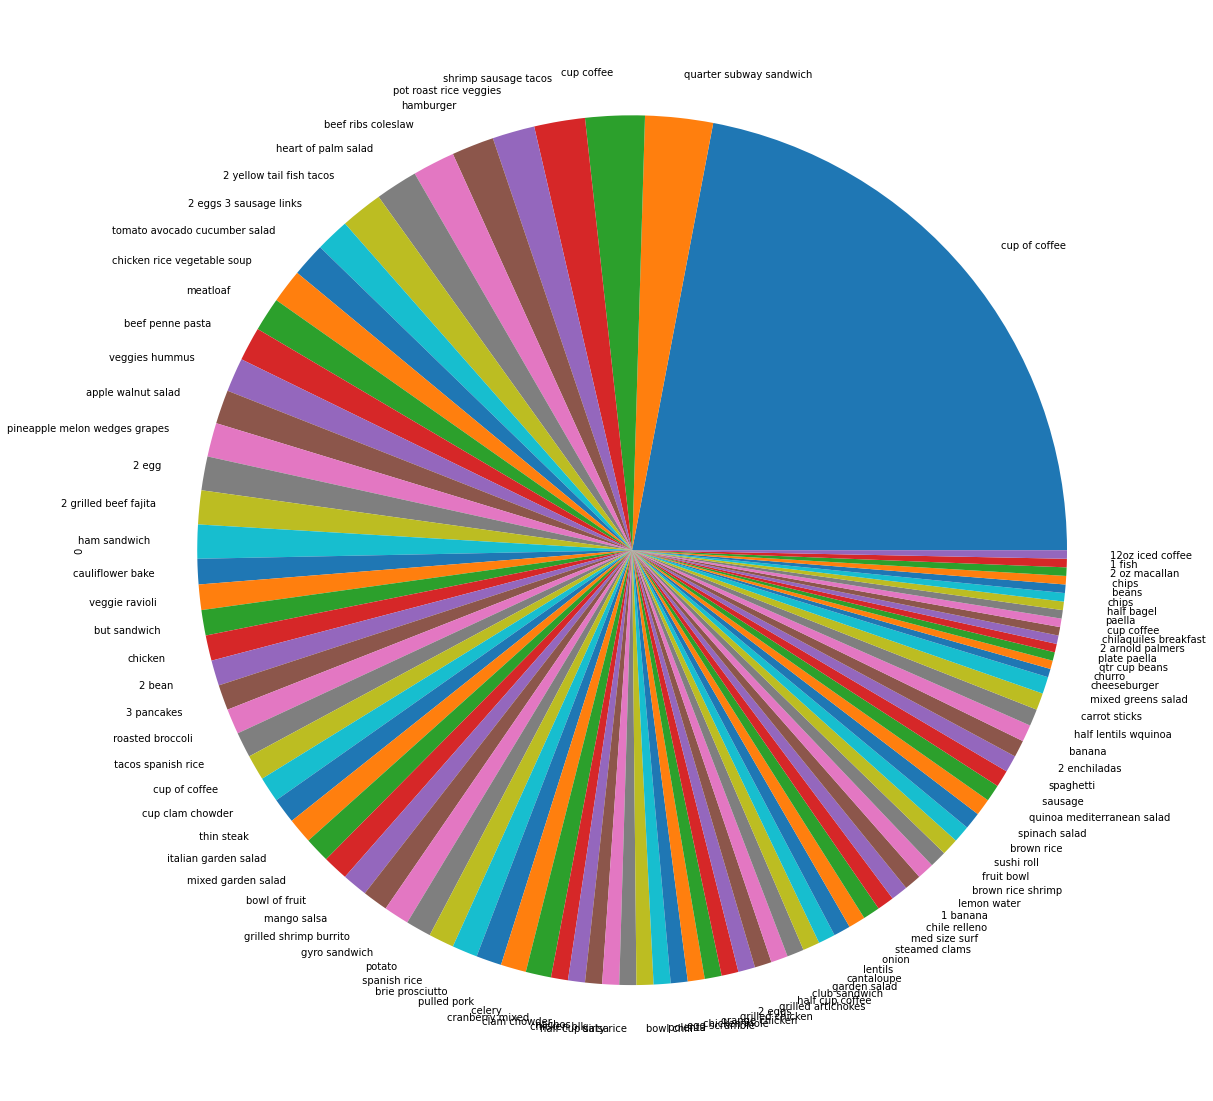

In [7]:
plt.figure(figsize=(20,20))
df_excludedNew[0].value_counts().plot(kind="pie")
plt.show()

In [15]:
order_dict ={}
for order in df_excluded[3]:
    item_list = re.split(r" w | n| and| with | &&", order) 
#     print (item_list)
    for item in item_list:
        if item not in order_dict.keys():
            order_dict[item] ={}
         
        for item2 in item_list:
            if item2 != item:
                if item2 in order_dict[item]:
                    order_dict[item][item2] += 1
                else: 
                    order_dict[item][item2] = 1
                    
                    
order_dict


        

{'hamburger': {'fries water': 3, 'sweet potato fries': 2},
 'fries water': {'hamburger': 3},
 ' onion': {' corn saute': 2},
 ' corn saute': {' onion': 2},
 'cup of coffee': {'creamer': 70, ' 2 eggs blk beans 1 tortilla': 4},
 'creamer': {'cup of coffee': 70,
  'cup coffee': 7,
  ' cup of coffee': 3,
  ' ok': 1,
  ' cup coffee': 1,
  ' 2 eggs blk beans 1 tortilla': 4},
 'half bagel': {'cream cheese': 1},
 'cream cheese': {'half bagel': 1},
 'meatloaf': {'mashed potatoes': 2, 'ashes potatoes': 2},
 'mashed potatoes': {'meatloaf': 2},
 'mixed garden salad': {'grilled': 3},
 'grilled': {'mixed garden salad': 3},
 ' chicken blk ': {' pinto beans': 2},
 ' pinto beans': {' chicken blk ': 2},
 ' celery': {'pnut butter chips': 3},
 'pnut butter chips': {' celery': 3},
 ' spanish rice': {' beans guacamole': 3},
 ' beans guacamole': {' spanish rice': 3},
 ' dirty rice': {'kidney beans': 2},
 'kidney beans': {' dirty rice': 2},
 'beef ribs coleslaw': {' bbq beans': 5},
 ' bbq beans': {'beef ribs c

{'hamburger': {'fries water': 0.6, 'sweet potato fries': 0.4, 'radius': 5}, 'fries water': {'hamburger': 1.0, 'radius': 3}, ' onion': {' corn saute': 1.0, 'radius': 2}, ' corn saute': {' onion': 1.0, 'radius': 2}, 'cup of coffee': {'creamer': 0.9459459459459459, ' 2 eggs blk beans 1 tortilla': 0.05405405405405406, 'radius': 74}, 'creamer': {'cup of coffee': 0.813953488372093, 'cup coffee': 0.08139534883720931, ' cup of coffee': 0.03488372093023256, ' ok': 0.011627906976744186, ' cup coffee': 0.011627906976744186, ' 2 eggs blk beans 1 tortilla': 0.046511627906976744, 'radius': 86}, 'half bagel': {'cream cheese': 1.0, 'radius': 1}, 'cream cheese': {'half bagel': 1.0, 'radius': 1}, 'meatloaf': {'mashed potatoes': 0.5, 'ashes potatoes': 0.5, 'radius': 4}, 'mashed potatoes': {'meatloaf': 1.0, 'radius': 2}, 'mixed garden salad': {'grilled': 1.0, 'radius': 3}, 'grilled': {'mixed garden salad': 1.0, 'radius': 3}, ' chicken blk ': {' pinto beans': 1.0, 'radius': 2}, ' pinto beans': {' chicken b

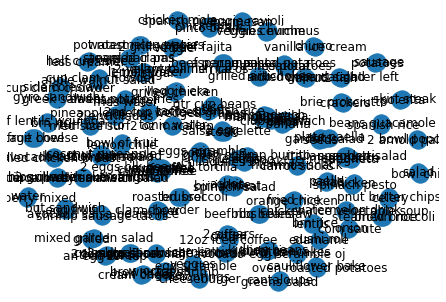

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for key, val in order_dict.items():
    summ = sum(val.values())
    for key2,val2 in val.items():

        order_dict[key][key2] = val2/summ
        G.add_edge(key, key2, weight=(order_dict[key][key2]*10))

    order_dict[key]['radius'] = summ
    
    
# g = nx.DiGraph()
# g.add_nodes_from(order_dict.keys()) 
# for k, v in order_dict.items():
#     g.add_edges_from(([(k, t) for t in v]))

    
    
# G.add_edge(key, key2, weight=(order_dict[key][key2]*10))
print(order_dict)
nx.draw(G, with_labels = True)

In [194]:
N = 10
out = dict(itertools.islice(order_dict.items(), N)) 
print(out)

{'hamburger': {'fries water': 0.6, 'sweet potato fries': 0.4, 'radius': 5}, 'fries water': {'hamburger': 1.0, 'radius': 3}, ' onion': {' corn saute': 1.0, 'radius': 2}, ' corn saute': {' onion': 1.0, 'radius': 2}, 'cup of coffee': {'creamer': 0.9459459459459459, ' 2 eggs blk beans 1 tortilla': 0.05405405405405406, 'radius': 74}, 'creamer': {'cup of coffee': 0.813953488372093, 'cup coffee': 0.08139534883720931, ' cup of coffee': 0.03488372093023256, ' ok': 0.011627906976744186, ' cup coffee': 0.011627906976744186, ' 2 eggs blk beans 1 tortilla': 0.046511627906976744, 'radius': 86}, 'half bagel': {'cream cheese': 1.0, 'radius': 1}, 'cream cheese': {'half bagel': 1.0, 'radius': 1}, 'meatloaf': {'mashed potatoes': 0.5, 'ashes potatoes': 0.5, 'radius': 4}, 'mashed potatoes': {'meatloaf': 1.0, 'radius': 2}}


In [196]:
G = nx.Graph()
G.add_edge(key, key2, weight=(out[key][key2]*10))
nx.draw(g, with_labels = True)

KeyError: ' 2 sugars'